# *Excercise 1*



## DATA PREPARATION: CREATE GRAPH

In [217]:
! pip install networkx



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [218]:
import random
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib.patches as patches
import time

point_num = 300
edge_num = 300
max_travel_time = 30 # (km)

points = []
paths = []

# fixed seed
random.seed(11)

# generate edges
for i in range(edge_num):
    point_1 = random.randint(0, point_num)
    point_2 = random.randint(0, point_num)
    while(point_1 == point_2):
        point_2 = random.randint(0, point_num)
    paths.append({
        'start': point_1,
        'dest': point_2,
        'travel_time': random.randint(0, max_travel_time)
        })


print(paths)



[{'start': 231, 'dest': 286, 'travel_time': 27}, {'start': 238, 'dest': 231, 'travel_time': 16}, {'start': 300, 'dest': 97, 'travel_time': 5}, {'start': 262, 'dest': 243, 'travel_time': 20}, {'start': 95, 'dest': 48, 'travel_time': 14}, {'start': 155, 'dest': 72, 'travel_time': 2}, {'start': 275, 'dest': 21, 'travel_time': 19}, {'start': 202, 'dest': 231, 'travel_time': 20}, {'start': 80, 'dest': 7, 'travel_time': 26}, {'start': 270, 'dest': 32, 'travel_time': 1}, {'start': 18, 'dest': 97, 'travel_time': 28}, {'start': 123, 'dest': 15, 'travel_time': 24}, {'start': 237, 'dest': 167, 'travel_time': 14}, {'start': 100, 'dest': 265, 'travel_time': 7}, {'start': 150, 'dest': 255, 'travel_time': 0}, {'start': 43, 'dest': 234, 'travel_time': 20}, {'start': 142, 'dest': 208, 'travel_time': 17}, {'start': 42, 'dest': 130, 'travel_time': 10}, {'start': 117, 'dest': 262, 'travel_time': 9}, {'start': 15, 'dest': 35, 'travel_time': 18}, {'start': 55, 'dest': 205, 'travel_time': 3}, {'start': 148, 

In [219]:
# Filter same destination from a start point
for i in range(len(paths)):
    for j in range(i+1, len(paths)):
        if (paths[i]['start'] == paths[j]['start']) and (paths[i]['dest'] == paths[j]['dest']):
            paths.pop(j)
            break

In [220]:
# print path


list_start = [path['start']for path in paths]
list_sorted_position = np.argsort(list_start)


for i in list_sorted_position:
    print(paths[i])


{'start': 3, 'dest': 192, 'travel_time': 17}
{'start': 5, 'dest': 188, 'travel_time': 9}
{'start': 5, 'dest': 241, 'travel_time': 17}
{'start': 6, 'dest': 36, 'travel_time': 2}
{'start': 7, 'dest': 209, 'travel_time': 24}
{'start': 7, 'dest': 125, 'travel_time': 18}
{'start': 8, 'dest': 0, 'travel_time': 6}
{'start': 8, 'dest': 178, 'travel_time': 16}
{'start': 9, 'dest': 243, 'travel_time': 29}
{'start': 9, 'dest': 49, 'travel_time': 6}
{'start': 10, 'dest': 107, 'travel_time': 5}
{'start': 11, 'dest': 18, 'travel_time': 6}
{'start': 11, 'dest': 117, 'travel_time': 30}
{'start': 14, 'dest': 111, 'travel_time': 25}
{'start': 15, 'dest': 133, 'travel_time': 4}
{'start': 15, 'dest': 35, 'travel_time': 18}
{'start': 17, 'dest': 88, 'travel_time': 17}
{'start': 17, 'dest': 10, 'travel_time': 19}
{'start': 18, 'dest': 91, 'travel_time': 7}
{'start': 18, 'dest': 97, 'travel_time': 28}
{'start': 19, 'dest': 52, 'travel_time': 7}
{'start': 20, 'dest': 102, 'travel_time': 5}
{'start': 21, 'dest

In [221]:
print(paths)

[{'start': 231, 'dest': 286, 'travel_time': 27}, {'start': 238, 'dest': 231, 'travel_time': 16}, {'start': 300, 'dest': 97, 'travel_time': 5}, {'start': 262, 'dest': 243, 'travel_time': 20}, {'start': 95, 'dest': 48, 'travel_time': 14}, {'start': 155, 'dest': 72, 'travel_time': 2}, {'start': 275, 'dest': 21, 'travel_time': 19}, {'start': 202, 'dest': 231, 'travel_time': 20}, {'start': 80, 'dest': 7, 'travel_time': 26}, {'start': 270, 'dest': 32, 'travel_time': 1}, {'start': 18, 'dest': 97, 'travel_time': 28}, {'start': 123, 'dest': 15, 'travel_time': 24}, {'start': 237, 'dest': 167, 'travel_time': 14}, {'start': 100, 'dest': 265, 'travel_time': 7}, {'start': 150, 'dest': 255, 'travel_time': 0}, {'start': 43, 'dest': 234, 'travel_time': 20}, {'start': 142, 'dest': 208, 'travel_time': 17}, {'start': 42, 'dest': 130, 'travel_time': 10}, {'start': 117, 'dest': 262, 'travel_time': 9}, {'start': 15, 'dest': 35, 'travel_time': 18}, {'start': 55, 'dest': 205, 'travel_time': 3}, {'start': 148, 

In [222]:
print(len(paths))


297


In [223]:
def draw_curved_edges(G, pos, arc_rad=0.25):
    ax = plt.gca()
    for u, v, data in G.edges(data=True):
        if G.has_edge(v, u) and u != v:  # Two-way connection
            rad = arc_rad
        else:
            rad = 0.0
        # Create a curved line between nodes
        arrow = patches.FancyArrowPatch(
            pos[u], pos[v],
            connectionstyle=f'arc3,rad={rad}',
            arrowstyle='-|>',
            color='black',
            lw=1,
            mutation_scale=10,
        )
        ax.add_patch(arrow)

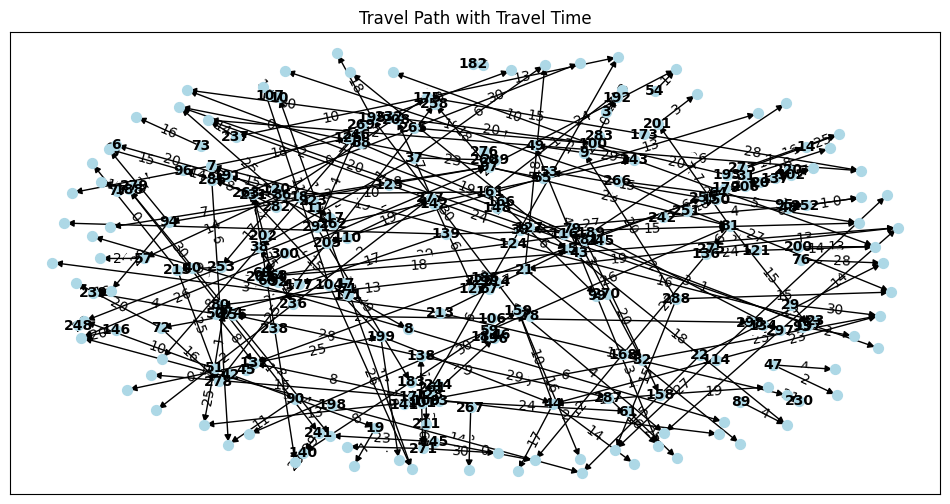

In [224]:
#import matplotlib.pyplot as plt
#import networkx as nx
# Given list of dictionaries
#edges = [{'start': 9, 'dest': 0, 'travel_time': 13}, {'start': 0, 'dest': 1, 'travel_time': 0}]

plt.figure(figsize=(12, 6))
# Create a directed graph
G = nx.DiGraph()

# Add edges to the graph and store travel time as an attribute
for i in range(len(paths)):
    G.add_edge(paths[i]['start'], paths[i]['dest'], travel_time=paths[i]['travel_time'])

# Draw the graph
pos = nx.spring_layout(G)  # Layout for visualization
#nx.draw(G, pos, with_labels=True, node_size=500, node_color='lightblue', font_size=10, font_weight='bold', arrows=True)
nx.draw_networkx_nodes(G, pos,node_color='lightblue', node_size=50)

# Draw edge labels (travel time)
edge_labels = {(path['start'], path['dest']): path['travel_time'] for path in paths}
node_labels = { path['start']: path['start'] for path in paths}

nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=10, font_weight='bold')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10, label_pos=0.5)
#nx.draw_networkx_edges(G, pos, arrows=True)
draw_curved_edges(G, pos)


# Display the graph
plt.title("Travel Path with Travel Time")
plt.show()


## SECTION 1: SHORTEST PATH

### Algorithm 1: Brute force

In [225]:
# Comment   Ctrl ->K->C
# Uncomment Ctrl ->K->U
# def getDestList(paths, start, total_time = 0):
#     destinations = []
#     for i in range(len(paths)):
#         if (paths[i]['start'] == start):
#             destinations.append({
#                                   'dest': paths[i]['dest'],
#                                   'travel_time': paths[i]['travel_time'],
#                                   'total_time': total_time + paths[i]['travel_time'],
#                                   'stop': False
#                                   })
#     return destinations


In [226]:
def getDestList_01(paths, start, total_time=0):
    destinations = []
    for i in range(len(paths)):
        if paths[i]['start'] == start:
            destinations.append({
                'dest': paths[i]['dest'],
                'travel_time': paths[i]['travel_time'],
                'total_time': total_time + paths[i]['travel_time'],
                'stop': False
            })
    return destinations

In [227]:
# print(getDestList(paths,3,0))

In [228]:

# def bruteForce(paths, start, dest, total_time = 0, history = {}):
# #    print(history)
# #    print(start)
#     if (start in history):
# #        print('looped')
#         return []
#     histories = []
#     destinations = getDestList(paths, start, total_time)
# #    print(np.asarray(destinations))
#     for each_dest in destinations:
#         new_hist = history.copy()
#         new_hist.update({start: total_time})
#         if (dest in new_hist):
# #            print('reached dest')
#             return [new_hist]
#         histories += bruteForce(paths, each_dest['dest'], dest, each_dest['total_time'], new_hist)

#     return histories




In [229]:
def bruteForce_01(paths, start, dest, total_time=0, history={}):
    # Check if current start node is already in history to avoid cycles
    if start in history:
        return []

    # Update the current path history
    new_history = history.copy()
    new_history[start] = total_time

    # Check if we have reached the destination
    if start == dest:
        return [new_history]

    # Get all possible destinations from the current start node
    histories = []
    destinations = getDestList_01(paths, start, total_time)
    for each_dest in destinations:
        histories += bruteForce_01(paths, each_dest['dest'], dest, each_dest['total_time'], new_history)

    return histories

In [230]:
# print(bruteForce(paths, 3, 4), sep='\n')

In [231]:
#print(bruteForce_01(paths, 3, 4), sep='\n')

In [232]:
def findShortestPathByBruteForce(paths,start,dest):
  listTravelTime = []
  listResultPaths = bruteForce_01(paths,start,dest)
  for items in listResultPaths:
    listTravelTime.append(list(items.values())[-1])
  if len(listTravelTime) != 0 :
   resultPath = listResultPaths[np.argmin(listTravelTime)]
  else :
    return {'path':[],'total_time':None}
  return {'path':[key for key in resultPath.keys()],'total_time':min(listTravelTime)}

start_time = time.time()
print(findShortestPathByBruteForce(paths,202, 96))
print('_____________________________________________')
print("Execution Time: %s seconds" % (time.time() - start_time))

{'path': [202, 231, 286, 96], 'total_time': 61}
_____________________________________________
Execution Time: 0.0035436153411865234 seconds


### Algorithm 2: Dijkstra


In [233]:
def dijkstra(paths, start, dest):
    # Step 1: Create a graph as an adjacency list
    graph = {}
    for path in paths:
        if path['start'] not in graph:
            graph[path['start']] = []
        graph[path['start']].append((path['dest'], path['travel_time']))

    # Step 2: Initialize data structures
    unvisited_nodes = {node: float('inf') for node in graph}  # Set all nodes' distances to infinity
    unvisited_nodes[start] = 0  # Start node has a distance of zero
    visited_nodes = {}  # Track visited nodes and shortest path times
    previous_nodes = {}  # Track the path taken to each node

    # Step 3: Loop until we visit all reachable nodes or find the destination
    while unvisited_nodes:
        # Select the node with the smallest known distance
        current_node = min(unvisited_nodes, key=unvisited_nodes.get)
        current_distance = unvisited_nodes[current_node]

        # If we reach the destination node, stop and construct the path
        if current_node == dest:
            path = []
            while current_node is not None:
                path.insert(0, current_node)
                current_node = previous_nodes.get(current_node)
            return {'path': path, 'total_time': current_distance}

        # Update the distances to each neighbor of the current node
        for neighbor, travel_time in graph.get(current_node, []):
            if neighbor in visited_nodes:
                continue  # Skip visited neighbors
            new_distance = current_distance + travel_time
            # If a shorter path to the neighbor is found, update the distance and path
            if new_distance < unvisited_nodes.get(neighbor, float('inf')):
                unvisited_nodes[neighbor] = new_distance
                previous_nodes[neighbor] = current_node

        # Mark the current node as visited
        visited_nodes[current_node] = current_distance
        unvisited_nodes.pop(current_node)

    # If we exit the loop without reaching the destination, return no path
    return {'path': [], 'total_time': float('inf')}

In [234]:
start_time = time.time()
print(dijkstra(paths, 202, 96))
print('_____________________________________________')
print("Execution Time: %s seconds" % (time.time() - start_time))

{'path': [202, 231, 286, 96], 'total_time': 61}
_____________________________________________
Execution Time: 0.0005936622619628906 seconds


### Algorithm 3: Bellman Ford

In [235]:
def bellman_ford(paths, start, dest):
    # Step 1: Initialize distances from start to all other nodes as infinity
    distances = {}
    previous_nodes = {}
    for path in paths:
        distances[path['start']] = float('inf')
        distances[path['dest']] = float('inf')
    distances[start] = 0

    # Step 2: Relax edges V-1 times
    for _ in range(len(distances) - 1):
        for path in paths:
            u, v, weight = path['start'], path['dest'], path['travel_time']
            if distances[u] != float('inf') and distances[u] + weight < distances[v]:
                distances[v] = distances[u] + weight
                previous_nodes[v] = u

    # Step 3: Reconstruct the shortest path from start to dest
    path = []
    current = dest
    while current in previous_nodes:
        path.insert(0, current)
        current = previous_nodes[current]
    if path:
        path.insert(0, start)

    return {
        'path': path if distances[dest] != float('inf') else [],
        'total_time': distances[dest] if distances[dest] != float('inf') else None
    }


In [236]:
start_time = time.time()
print(bellman_ford(paths, 202, 96))
print('_____________________________________________')
print("Execution Time: %s seconds" % (time.time() - start_time))

{'path': [202, 231, 286, 96], 'total_time': 61}
_____________________________________________
Execution Time: 0.016797304153442383 seconds


In [237]:
#
#     CODE IN TEST
#
#def getPath(paths, start, dest):
#    for i in paths:
#        if (i['start'] == start) and (i['dest'] == dest):
            #print(i)
#            return i
#    return None

#def FloydWarshall(paths):
#    all_path_time = [[0] * 4] * 4
#    for k in range(1, 4 + 1):
#        for i in range(1, 4 + 1):
#            for j in range(1, 4 + 1):
#                path_i_j = getPath(paths, i, j)
#                path_i_k = getPath(paths, i, k)
#                path_k_j = getPath(paths, k, j)
#                if (path_i_j != None and path_i_k != None and path_k_j != None):
#                    #print(i)
#                    temp = all_path_time[i-1][j-1] + min(
#                        path_i_j['travel_time'],
#                        path_i_k['travel_time'] + path_k_j['travel_time']
#                        )
#                    all_path_time[i-1][j-1] = min(temp, all_path_time[i-1][j-1])
#    return all_path_time
#
#print(*FloydWarshall(paths_FloydWarshall_example), sep='\n')

In [238]:
#import requests

#URL = 'https://api.tomtom.com/traffic/services/4/flowSegmentData/relative0/10/json?point=52.41092%2C4.84239&unit=KMPH&openLr=false&key=AdIZYsAK6AH2VDGDmLqDhLRU8xc4Z86k'
#lat = "10.7705100"
#lon = "106.6608836"
#URL_1 = 'https://api.tomtom.com/traffic/services/4/flowSegmentData/relative0/10/json?point='+  +'&unit=KMPH&openLr=false&key=AdIZYsAK6AH2VDGDmLqDhLRU8xc4Z86k'
#response = requests.get("http://www.google.com")
#response = requests.get(URL)
#print(response.content)
#print(response.content == response.text)

## SECTION 2: MAX FLOW

 ### Algorithm 1: Brute Force


In [239]:
def getDestList(paths, start, total_time = 0):
    destinations = []
    for i in range(len(paths)):
        if (paths[i]['start'] == start):
            destinations.append({
                                  'dest': paths[i]['dest'],
                                  'travel_time': paths[i]['travel_time'],
                                  'total_time': total_time + paths[i]['travel_time'],
                                  'stop': False
                                  })
    return destinations

In [240]:
def findAllPaths(paths, start, dest, total_time=0, history=None):
    if history is None:
        history = []

    # Check for a loop by iterating through history manually
    for node in history:
        if node['start'] == start:
        #if any(edge['dest'] == start for edge in history):
            return []  # If start is already in history, we have a loop

    histories = []
    destinations = getDestList(paths, start, total_time)

    for each_dest in destinations:
        # Create a new history for this path
        new_hist = history + [{'start': start, 'dest': each_dest['dest'], 'travel_time': each_dest['travel_time']}]

        # If we reached the destination, add this path to histories
        if each_dest['dest'] == dest:
            histories.append(new_hist)
        else:
            # Continue searching from the next destination
            histories += findAllPaths(paths, each_dest['dest'], dest, each_dest['total_time'], new_hist)

    return histories


In [241]:
def maxFlowByBruteForce(paths, start, dest):
    # Step 1: Find all possible paths from start to dest
    all_paths = findAllPaths(paths, start, dest)

    # Step 2: For each path, find the minimum travel time (this is the path's flow capacity)
    path_flows = []
    check_flows = []
    for path in all_paths:
        # Get the minimum travel_time in the path
        min_travel_time = min(edge['travel_time'] for edge in path)
        path_flows.append(min_travel_time)
        check_flows.append([(edge['start'],edge['dest'],edge['travel_time']) for edge in path])

    #
    # Step 3: The maximum flow is the sum of all path flows
    max_flow = sum(path_flows)

    return max_flow, check_flows, path_flows


In [242]:
maxflow, all_paths, path_flows = maxFlowByBruteForce(paths, 3,101)

for path in all_paths:
    print(path)
print(path_flows)

[]


In [243]:
print(maxflow)

0


In [244]:
#
# Find two connected nodes that have valid edge
#
for j in range(300):
 for i in range (300):
   maxflow, all_paths, path_flows = maxFlowByBruteForce(paths,j, i)
   if len(path_flows) >= 5 :
     for path in all_paths:
       print(path)
     break


[(202, 231, 20), (231, 286, 27), (286, 96, 14), (96, 36, 15)]
[(202, 294, 0), (294, 69, 27), (69, 68, 15), (68, 236, 2), (236, 277, 2), (277, 142, 2), (142, 208, 17), (208, 232, 11), (232, 100, 20), (100, 265, 7), (265, 263, 0), (263, 286, 8), (286, 96, 14), (96, 36, 15)]
[(202, 294, 0), (294, 69, 27), (69, 68, 15), (68, 236, 2), (236, 277, 2), (277, 142, 2), (142, 122, 6), (122, 67, 23), (67, 214, 20), (214, 186, 24), (186, 226, 4), (226, 132, 0), (132, 199, 25), (199, 263, 15), (263, 286, 8), (286, 96, 14), (96, 36, 15)]
[(202, 294, 0), (294, 69, 27), (69, 207, 14), (207, 68, 28), (68, 236, 2), (236, 277, 2), (277, 142, 2), (142, 208, 17), (208, 232, 11), (232, 100, 20), (100, 265, 7), (265, 263, 0), (263, 286, 8), (286, 96, 14), (96, 36, 15)]
[(202, 294, 0), (294, 69, 27), (69, 207, 14), (207, 68, 28), (68, 236, 2), (236, 277, 2), (277, 142, 2), (142, 122, 6), (122, 67, 23), (67, 214, 20), (214, 186, 24), (186, 226, 4), (226, 132, 0), (132, 199, 25), (199, 263, 15), (263, 286, 8), (

 ### Algorithm 2: Ford-Fulkerson

> Add blockquote




In [245]:
def buildResidualGraph(paths):
    residual_graph = {}
    for path in paths:
        u, v, capacity = path['start'], path['dest'], path['travel_time']

        # Initialize forward edge
        if u not in residual_graph:
            residual_graph[u] = {}
        if v not in residual_graph[u]:
            residual_graph[u][v] = capacity
        else:
            residual_graph[u][v] += capacity  # Sum capacities if multiple edges

        # Initialize reverse edge with 0 capacity
        if v not in residual_graph:
            residual_graph[v] = {}
        if u not in residual_graph[v]:
            residual_graph[v][u] = 0

    return residual_graph

# def buildResidualGraph(paths):
#     residual_graph = {}
#     for path in paths:
#         u, v, capacity = path['start'], path['dest'], path['travel_time']

#         # Initialize forward edge only
#         if u not in residual_graph:
#             residual_graph[u] = {}
#         if v not in residual_graph[u]:
#             residual_graph[u][v] = capacity
#         else:
#             residual_graph[u][v] += capacity  # Sum capacities if multiple edges

#     return residual_graph

In [246]:
def dfs(residual_graph, start, dest, visited, path):
    if start == dest:
        return path

    visited.add(start)

    for neighbor, capacity in residual_graph[start].items():
        if neighbor not in visited and capacity > 0:  # Only consider edges with positive capacity
            result = dfs(residual_graph, neighbor, dest, visited, path + [(start, neighbor, capacity)])
            if result is not None:
                return result
    return None

# def dfs(residual_graph, start, dest, visited, path):
#     if start == dest:
#         return path

#     visited.add(start)

#     for neighbor, capacity in residual_graph.get(start, {}).items():
#         if neighbor not in visited and capacity > 0:  # Only consider edges with positive capacity
#             result = dfs(residual_graph, neighbor, dest, visited, path + [(start, neighbor, capacity)])
#             if result is not None:
#                 return result
#     return None

In [247]:
def fordFulkerson(paths, start, dest):
    residual_graph = buildResidualGraph(paths)
    max_flow = 0
    all_routes = []
    min_travel_times = []
    if start not in residual_graph:
        return 0, [], []
    while True:
        # Find an augmenting path using DFS
        visited = set()
        augmenting_path = dfs(residual_graph, start, dest, visited, [])

        if augmenting_path is None:
            break  # No more augmenting paths

        # Calculate the minimum travel time (bottleneck) along the path
        path_flow = min(edge[2] for edge in augmenting_path)

        # Store the path and its minimum travel time
        all_routes.append(augmenting_path)
        min_travel_times.append(path_flow)

        # Augment the flow along the path
        for u, v, capacity in augmenting_path:
            residual_graph[u][v] -= path_flow  # Reduce capacity in forward direction
            residual_graph[v][u] += path_flow  # Increase capacity in reverse direction

        max_flow += path_flow  # Increase the total max flow by the path's bottleneck capacity

    return max_flow, all_routes, min_travel_times

# def fordFulkerson(paths, start, dest):
#     residual_graph = buildResidualGraph(paths)
#     max_flow = 0
#     all_routes = []
#     min_travel_times = []

#     # If start is not in the graph, return immediately
#     if start not in residual_graph:
#         return 0, [], []

#     while True:
#         # Find an augmenting path using DFS
#         visited = set()
#         augmenting_path = dfs(residual_graph, start, dest, visited, [])

#         if augmenting_path is None:
#             break  # No more augmenting paths

#         # Calculate the minimum travel time (bottleneck) along the path
#         path_flow = min(edge[2] for edge in augmenting_path)

#         # Store the path and its minimum travel time
#         all_routes.append(augmenting_path)
#         min_travel_times.append(path_flow)

#         # Augment the flow along the path
#         for u, v, capacity in augmenting_path:
#             # Reduce capacity in forward direction
#             residual_graph[u][v] -= path_flow
#             # If the forward capacity becomes zero, remove the edge entirely
#             if residual_graph[u][v] == 0:
#                 del residual_graph[u][v]

#             # Increase capacity in reverse direction dynamically
#             if v not in residual_graph:
#                 residual_graph[v] = {}
#             if u not in residual_graph[v]:
#                 residual_graph[v][u] = path_flow  # Initialize reverse edge with path flow
#             else:
#                 residual_graph[v][u] += path_flow  # Add flow to existing reverse capacity

#         max_flow += path_flow  # Increase the total max flow by the path's bottleneck capacity

#     return max_flow, all_routes, min_travel_times

In [248]:
fordFulkerson(paths,1,3)

(0, [], [])

In [249]:
buildResidualGraph(paths)

{231: {286: 27, 238: 0, 202: 0, 161: 0},
 286: {231: 0, 96: 14, 269: 0, 263: 0},
 238: {231: 16, 249: 5},
 300: {97: 5, 247: 26, 69: 7},
 97: {300: 0, 18: 0, 260: 0, 81: 23, 12: 24, 94: 3, 258: 18, 289: 0},
 262: {243: 20, 117: 0, 130: 7, 7: 10},
 243: {262: 0, 9: 0, 131: 5, 268: 10},
 95: {48: 14},
 48: {95: 0, 296: 1},
 155: {72: 2, 138: 0, 106: 0},
 72: {155: 0, 24: 20, 278: 16},
 275: {21: 19, 234: 13, 81: 0, 168: 0},
 21: {275: 0, 74: 6, 143: 18, 80: 13},
 202: {231: 20, 294: 0},
 80: {7: 26, 144: 29, 21: 0},
 7: {80: 0, 209: 24, 124: 0, 262: 0, 125: 18},
 270: {32: 1, 79: 3},
 32: {270: 0, 141: 26, 219: 25},
 18: {97: 28, 91: 7, 11: 0},
 123: {15: 24, 167: 12},
 15: {123: 0, 35: 18, 213: 0, 133: 4},
 237: {167: 14, 175: 0},
 167: {237: 0, 123: 0, 49: 0},
 100: {265: 7, 283: 0, 232: 0, 192: 0, 20: 20},
 265: {100: 0, 263: 0, 225: 30},
 150: {255: 0, 251: 0},
 255: {150: 0, 293: 0, 226: 0, 53: 15},
 43: {234: 20, 207: 18},
 234: {43: 0, 297: 0, 275: 0},
 142: {208: 17, 122: 6, 277:

### Algorithm 3: Edmonds-Karp

In [250]:
def convert_to_graph_for_edmonds_karp(paths):
    G = nx.DiGraph()
    for path in paths:
        u, v, capacity = path['start'], path['dest'], path['travel_time']
        G.add_edge(u, v, capacity=capacity)
    return G

In [251]:
from edmonds_karp import find_maximum_flow_using_edmonds_karp, find_maximum_flow_using_edmonds_karp_multidigraph

In [252]:
edmonds_karp = find_maximum_flow_using_edmonds_karp(convert_to_graph_for_edmonds_karp(paths),1,3)
print(f'max value: {edmonds_karp[0]}')


max value: 0


# *Excercise 2*

## DATA PREPARATION: CREATE GRAPH

In [253]:
! pip install osmnx


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [254]:
import networkx as nx
import osmnx as ox
import math
import numpy as np
import os
ox.settings.use_cache = True

### Extract Data

In [255]:
def getDir(file_name):
    full_path = os.path.abspath('')
    path, filename = os.path.split(full_path)
    dir = os.path.join(path, file_name)
    print(dir)
    return dir

def saveToTxt(data, name):
    dir = getDir(name)
    with open(dir, 'w', encoding='utf8') as f:
        for line in data:
            #print(line)
            f.write(str(line) + "\n")
    return

def getMap(nodes):
    max_lon = float('-inf')
    max_lat = float('-inf')
    min_lon = float('inf')
    min_lat = float('inf')
    for i in nodes:
        max_lon = max(max_lon, i['long'])
        min_lon = min(min_lon, i['long'])
        max_lat = max(max_lat, i['lat'])
        min_lat = min(min_lat, i['lat'])
    print(max_lon, min_lon, max_lat, min_lat)
    print((max_lon + min_lon)/2, (max_lat + min_lat)/2, (max_lon - min_lon)/2, (max_lat - min_lat)/2)
    return max_lon, min_lon, max_lat, min_lat

def smartParse(str):
    str = str.replace("\n","")
    #print(str)
    try:
        i = int(str)
        return i
    except:
        pass
    try:
        f = float(str)
        return f
    except:
        pass
    return str

def extractCSV(txt, filter=[]):
    title = None
    data = []
    for line in txt:
        line_data = line.split(',')
        for i in filter:
            line_data.pop(i)
        if not title:
            title = [smartParse(i) for i in line_data]
        new_data = {}
        for i in range(len(line_data)):
            new_data.update({title[i]: smartParse(line_data[i])})
        #print(new_data)
        data.append(new_data)
    return data[1:]

def extractData():
    dir_edges = getDir('train.csv')
    data_edges = open(dir_edges, encoding='utf8')
    data_edges = extractCSV(data_edges, [13, 10, 9, 5, 4, 3, 2, 1, 0]) # pop filter from last to 1st
    data_edges = sorted([dict(t) for t in {tuple(d.items()) for d in data_edges}], key=lambda d: (d['s_node_id'], d['e_node_id'])) # remove duplicates
    #for i in data_edges:
    #    print(i)
    print('Number of edges: ', len(data_edges))
    saveToTxt(data_edges, 'log/edges.txt') # save to log

    dir_nodes = getDir('nodes.csv')
    data_nodes = open(dir_nodes, encoding='utf8')
    data_nodes = extractCSV(data_nodes)
    data_nodes = sorted([dict(t) for t in {tuple(d.items()) for d in data_nodes}], key=lambda d: d['_id']) # remove duplicates
    #for i in data_nodes:
    #    print(i)
    print('Number of nodes: ', len(data_nodes))
    saveToTxt(data_nodes, 'log/nodes.txt') # save to log
    #print(data_nodes[0])

    # TRAIN.CVS ==========================================
    # s_node_id, e_node_id, length, street_id, street_name, long_snode, lat_snode, long_enode, lat_enode
    # [
    #    [..],
    #    [..],
    #    [..],
    #    ...
    #    [..],
    # ]

    # NODES.CVS ==========================================
    # _id, long, lat
    # [
    #    [..],
    #    [..],
    #    [..],
    #    ...
    #    [..],
    # ]

    getMap(data_nodes)
    return data_nodes, data_edges

### Load Data

In [256]:
def removeNodes(graph):
    # Select all nodes with only 2 neighbors
    nodes_to_remove = [n for n in graph.nodes if len(list(graph.neighbors(n))) == 2]

    # For each of those nodes
    for node in nodes_to_remove:
        # get the number of neigbors for each node
        neghbors = len(list(graph.neighbors(node)))
        # case 1: 1 neighbors -> remove
        if neghbors == 1:
            graph.remove_node(node)
        # case 2: 2 neighbors -> remove, connect the neighbors
        elif neghbors == 2:
            # We add an edge between neighbors (len == 2 so it is correct)
            graph.add_edge(*graph.neighbors(node))
            # And delete the node
            graph.remove_node(node)

    #single_nodes = []
    #for node in graph.nodes(data=True):
    #    if 'street_count' in node[1]:
    #        #print(node[1])
    #        if node[1]['street_count'] == 0:
    #            single_nodes.append(node[0])
    #print(single_nodes)
    #for node in single_nodes:
    #    graph.remove_node(node)

    return graph

# def loadMap(map_name):
    # load map from file
    # G = ox.io.load_graphml(filepath=getDir(map_name))
    # G = ox.io.load_graphml(filepath=r'/content/'+map_name)
    # print('G: ', G)
    #G = removeNodes(G)
    # print('G: ', G)
    #G = nx.DiGraph(G)
    #G = ox.convert.to_digraph(G, weight='length')
    # print('G: ', G)
    #G = removeNodes(G)
    # print('G: ', G)

    '''
    # impute edge (driving) speeds and calculate edge travel times
    G = ox.speed.add_edge_speeds(G)
    G = ox.speed.add_edge_travel_times(G)

    # you can convert MultiDiGraph to/from GeoPandas GeoDataFrames
    gdf_nodes, gdf_edges = ox.utils_graph.graph_to_gdfs(G)
    G = ox.utils_graph.graph_from_gdfs(gdf_nodes, gdf_edges, graph_attrs=G.graph)

    # convert MultiDiGraph to DiGraph to use nx.betweenness_centrality function
    # choose between parallel edges by minimizing travel_time attribute value
    D = ox.utils_graph.get_digraph(G, weight="travel_time")

    # calculate node betweenness centrality, weighted by travel time
    bc = nx.betweenness_centrality(D, weight="travel_time", normalized=True)
    nx.set_node_attributes(G, values=bc, name="bc")

    # plot the graph, coloring nodes by betweenness centrality
    #nc = ox.plot.get_node_colors_by_attr(G, "bc", cmap="plasma")
    #fig, ax = ox.plot.plot_graph(
    #    G, bgcolor="k", node_color=nc, node_size=50, edge_linewidth=2, edge_color="#333333"
    #)
    '''
    # return G

### Main

In [257]:
def benchmark(algo_func, paths, start, end):
    start_time = time.time()
    result = algo_func(paths, start, end)
    end_time = time.time()
    return result, (end_time-start_time)

paths_FloydWarshall_example = [
    {'start': 1, 'dest': 2, 'travel_time': 1},
    {'start': 1, 'dest': 4, 'travel_time': 4},
    {'start': 2, 'dest': 1, 'travel_time': 2},
    {'start': 2, 'dest': 3, 'travel_time': -2},
    {'start': 3, 'dest': 1, 'travel_time': 3},
    {'start': 4, 'dest': 1, 'travel_time': 4},
    {'start': 4, 'dest': 2, 'travel_time': -5},
    {'start': 4, 'dest': 3, 'travel_time': -1}
]


def estimate_max_capacity(data):
  max_capacity = 0
  if data['highway']  == 'trunk':
    max_capacity = 500
  elif data['highway']  == ['trunk', 'primary'] or data['highway'] == ['tertiary', 'secondary']:
    max_capacity = 400
  elif data['highway'] == 'primary':
    max_capacity = 300
  elif data['highway'] == 'primary_link' or data['highway'] == 'secondary':
    max_capacity = 200
  elif data['highway'] == 'secondary_link':
    max_capacity = 150
  elif data['highway'] == 'tertiary':
    max_capacity = 100
  elif data['highway'] == 'tertiary_link' or data['highway'] == 'living_street':
    max_capacity = 70
  elif data['highway'] == 'residential':
    max_capacity = 30
  else:
    max_capacity = 20
  return round(max_capacity*(1+np.random.uniform(-0.1, 0.1)))




def edgeConverter(edges_format_1):

    #edges_format_2 = [{'start': i[0], 'dest': i[1], 'travel_time': edges_format_1[i]['length']} for i in edges_format_1]
    #edges_format_2 = [{'start': u, 'dest': v, 'travel_time': round(data.get("length", 0))} for u,v,data in graph.edges(data=True)]
    edges_format_2 = [{'start': u, 'dest': v, 'travel_time': round(data.get("length", 0))} for u,v,data in edges_format_1]
    #dges_format_2 = [{'start': u, 'dest': v, 'travel_time': estimate_max_capacity(data)} for u,v,data in edges_format_1]

    return edges_format_2


def convertToPathFormatVisualize(list_paths):
  path_format_visualize = []
  for path in list_paths:
    path_node_list = []
    for node in path:
      path_node_list.append(node[0])
      if node == path[-1]:
        path_node_list.append(node[1])
    path_format_visualize.append(path_node_list)
    #print(path_node_list)
  return path_format_visualize


def make_street_two_way(G, u, v):
    # Check if the forward edge exists
    if G.has_edge(u, v):
        # Iterate over each edge key between u and v
        for key, edge_data in G[u][v].items():
            # Update the 'oneway' attribute to False
            edge_data['oneway'] = False
            #print(f"Updated edge ({u}, {v}, key={key}) to be two-way.")

            # Check if the reverse edge (v, u) with the same key exists
            if not G.has_edge(v, u, key):
                # If reverse edge doesn't exist, add it with the same attributes
                reverse_edge_data = edge_data.copy()  # Copy attributes from the original edge
                G.add_edge(v, u, key=key, **reverse_edge_data)
                #print(f"Added reverse edge ({v}, {u}, key={key}) with attributes: {reverse_edge_data}")
            #else:
                #print(f"Reverse edge ({v}, {u}, key={key}) already exists.")
    #else:
        #print(f"Edge ({u}, {v}) not found in the graph.")

def check_and_convert_to_two_way(graph, list_paths):
  # check one-way street
  #list_tmp_valid =[]
  list_tmp_non_valid =[]
  for i in range(len(list_paths)):
    for data in list_paths[i]:
        if graph.get_edge_data(data[0],data[1]) == None:
          list_tmp_non_valid.append((data[0],data[1]))
        #else:
        #  list_tmp_valid.append((data[0],data[1]))
  #print(len(list_tmp_valid))
  #print(len(list_tmp_non_valid))
  #print(list_tmp_valid)

  # drop duplicated path in list_tmp_non_valid
  drop_duplicate_path = []
  for path in list_tmp_non_valid:
    if path not in drop_duplicate_path:
        drop_duplicate_path.append(path)
  # apply def make_street_two_way
  for path in drop_duplicate_path:
    make_street_two_way(graph, path[1], path[0])
  return graph




def runAlgorithm(algorithm, graph):
    # pick start and end point randomly (seeded)
    random.seed(10)
    start, end = random.sample(sorted(graph._node), 2)
    # start = 5
    # end = 507
    print('start: ', start)
    print('end: ', end)

    # convert edge to our format
    edges_format_ours = edgeConverter(graph.edges(data=True))
    found_paths, run_time = benchmark(algorithm, edges_format_ours, start, end)
    print('==============================================')
    print('Found paths:')
    print(*found_paths, sep='\n')
    print('\nTime elapsed:')
    print(run_time)
    '''
    nodes, edges = extractData()
    #print(edges)
    found_paths, run_time = benchmark(bruteForce, edges, 4639027499, 366430703)
    print('==============================================')
    print('Found paths:')
    print(*found_paths, sep='\n')
    print('\nTime elapsed:')
    print(run_time)
    '''
    return

In [258]:
# load the graph from map file
from load_map import loadMap

map_name = 'newgraph_conso.osm'
graph = loadMap(map_name)
print(graph)

/home/phuocho/Projects/cst_241/newgraph_conso.osm
G:  MultiDiGraph with 1686 nodes and 4100 edges
MultiDiGraph with 1686 nodes and 4100 edges


In [259]:
# convert graph to edges_format_2
edges_format_1 = graph.edges(data=True)
edges_format_2 = edgeConverter(edges_format_1)
print(edges_format_2)

[{'start': 0, 'dest': 1, 'travel_time': 99}, {'start': 0, 'dest': 47, 'travel_time': 95}, {'start': 1, 'dest': 352, 'travel_time': 164}, {'start': 1, 'dest': 0, 'travel_time': 99}, {'start': 1, 'dest': 1185, 'travel_time': 62}, {'start': 1, 'dest': 1684, 'travel_time': 52}, {'start': 2, 'dest': 3, 'travel_time': 65}, {'start': 2, 'dest': 4, 'travel_time': 148}, {'start': 2, 'dest': 5, 'travel_time': 97}, {'start': 2, 'dest': 6, 'travel_time': 109}, {'start': 3, 'dest': 2, 'travel_time': 65}, {'start': 3, 'dest': 1145, 'travel_time': 55}, {'start': 4, 'dest': 507, 'travel_time': 100}, {'start': 4, 'dest': 572, 'travel_time': 91}, {'start': 4, 'dest': 2, 'travel_time': 148}, {'start': 5, 'dest': 509, 'travel_time': 74}, {'start': 5, 'dest': 2, 'travel_time': 97}, {'start': 5, 'dest': 507, 'travel_time': 148}, {'start': 6, 'dest': 2, 'travel_time': 109}, {'start': 6, 'dest': 221, 'travel_time': 153}, {'start': 7, 'dest': 8, 'travel_time': 98}, {'start': 7, 'dest': 9, 'travel_time': 43}, {

In [260]:
# run fordFulkerson
max_flow_by_ff,list_paths,list_travel_time = fordFulkerson(edges_format_2,1,12)
print(f'Sum list_travel_time: {sum(list_travel_time)}')
print(f'Max_Flow: {max_flow_by_ff}')
print(f'Length List Path: {len(list_paths)}')
print(f'List travel time: {list_travel_time}')
print(list_paths[:3])


Sum list_travel_time: 263
Max_Flow: 263
Length List Path: 145
List travel time: [30, 2, 2, 3, 1, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 8, 4, 2, 1, 1, 2, 1, 2, 3, 1, 3, 5, 1, 1, 5, 2, 3, 3, 1, 1, 2, 1, 1, 1, 3, 1, 2, 6, 3, 2, 2, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 4, 3, 2, 1, 4, 1, 1, 1, 1, 3, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 3, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 5, 1, 1, 3]
[[(1, 0, 99), (0, 47, 95), (47, 17, 397), (17, 14, 205), (14, 15, 209), (15, 1161, 52), (1161, 124, 101), (124, 122, 68), (122, 123, 51), (123, 339, 131), (339, 254, 53), (254, 158, 53), (158, 154, 52), (154, 155, 168), (155, 177, 52), (177, 146, 59), (146, 145, 56), (145, 147, 50), (147, 351, 416), (351, 532, 57), (532, 533, 165), (533, 1683, 127), (1683, 354, 137), (354, 352, 104), (352, 353, 98), (353, 1187, 64), (1187, 479, 158), (479, 478, 135), (478, 1191, 89), (1191, 1189

In [261]:
#print(convertToPathFormatVisualize(list_paths))
#print(len(convertToPathFormatVisualize(list_paths)))
#[len(path) for path in list_paths]
#np.argmin([sum(path) for path in list_paths])

list_tmp = []
for path in list_paths:
  list_capacity = []
  for node in path:
    list_capacity.append(node[-1])
  list_tmp.append(sum(list_capacity))

print(np.argmax(list_tmp))


print(np.argmin([len(path) for path in list_paths]))


138
60


[[1, 0, 47, 17, 14, 15, 1161, 124, 122, 123, 339, 254, 158, 154, 155, 177, 146, 145, 147, 351, 532, 533, 1683, 354, 352, 353, 1187, 479, 478, 1191, 1189, 1190, 595, 227, 142, 141, 143, 1318, 488, 487, 605, 603, 484, 483, 485, 404, 348, 347, 349, 452, 1398, 198, 77, 74, 75, 1248, 1246, 1244, 1243, 1245, 902, 903, 901, 8, 904, 905, 1438, 1197, 315, 72, 21, 18, 19, 41, 40, 20, 409, 73, 265, 266, 450, 983, 379, 1282, 1578, 1077, 609, 448, 36, 33, 34, 552, 94, 92, 93, 362, 23, 1235, 250, 1233, 1492, 1042, 538, 895, 1487, 1488, 410, 378, 380, 984, 201, 199, 200, 497, 202, 375, 376, 59, 57, 58, 60, 1153, 1152, 963, 241, 242, 1154, 1155, 1159, 414, 415, 357, 355, 356, 987, 316, 317, 217, 216, 218, 1651, 67, 65, 66, 313, 98, 99, 846, 847, 1403, 54, 976, 977, 947, 948, 1356, 1287, 1288, 1389, 1563, 1289, 1290, 968, 955, 1291, 1292, 117, 62, 61, 63, 189, 190, 456, 1478, 812, 811, 472, 303, 272, 270, 271, 382, 346, 304, 345, 437, 311, 309, 310, 1497, 1496, 402, 1325, 999, 169, 167, 168, 1507, 1508

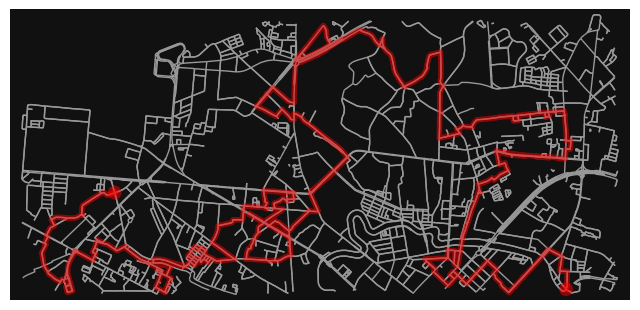

In [262]:
# visualize
#G2 = ox.io.load_graphml(filepath=r'/content/'+'newgraph_conso.osm')
#fig, ax = ox.plot_graph(G2, node_color="r")
path_format_visualize = convertToPathFormatVisualize(list_paths)
processed_graph = check_and_convert_to_two_way(graph, list_paths)
print(path_format_visualize)
print(len(path_format_visualize))
fig, ax = ox.plot_graph_route(processed_graph, path_format_visualize[14], node_size=0)



In [263]:
# shortest path
result = dijkstra(edges_format_2,1,12)
print(result)

{'path': [1, 352, 354, 450, 983, 1678, 1282, 1578, 537, 538, 1041, 1042, 1492, 1233, 1483, 1659, 250, 1579, 1235, 23, 461, 68, 69, 598, 808, 108, 1481, 809, 810, 787, 326, 56, 27, 788, 889, 886, 804, 1491, 879, 965, 589, 588, 590, 1080, 1078, 1010, 1009, 1011, 280, 279, 281, 1562, 162, 164, 239, 139, 138, 140, 12], 'total_time': 7005}


In [264]:
edges_format_1 = graph.edges(data=True)
edges_format_2 = edgeConverter(edges_format_1)
#print(edges_format_2)
result1 = dijkstra(edges_format_2,1,12)
print(result1)


{'path': [1, 352, 354, 450, 983, 1678, 1282, 1578, 537, 538, 1042, 1492, 1233, 1483, 1659, 250, 1579, 1235, 23, 461, 68, 69, 598, 108, 1481, 809, 810, 787, 326, 56, 27, 788, 889, 886, 882, 320, 318, 319, 606, 1080, 1078, 1010, 1009, 1011, 280, 279, 281, 1562, 162, 164, 239, 139, 138, 140, 12], 'total_time': 6941}


In [265]:
listpath_shortest = [result1['path']]

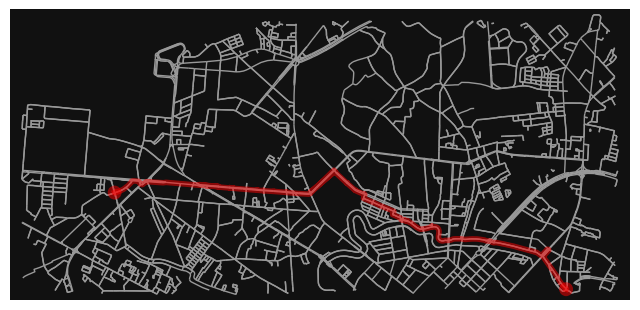

In [266]:
#path_format_visualize1 = convertToPathFormatVisualize(listpath_shortest)
#processed_graph1 = check_and_convert_to_two_way(graph, listpath_shortest)
#print(path_format_visualize)
#print(len(path_format_visualize))
fig, ax = ox.plot_graph_route(processed_graph, result1['path'], node_size=0)

## Networkx maxflow

In [269]:
from networkx import maximum_flow
networkx_maximum_flow = maximum_flow(convert_to_graph_for_edmonds_karp(edges_format_2), 1, 12)
print(f'Networkx max value: {networkx_maximum_flow[0]}')

Networkx max value: 263


## Edmond Karps

Max value: 263


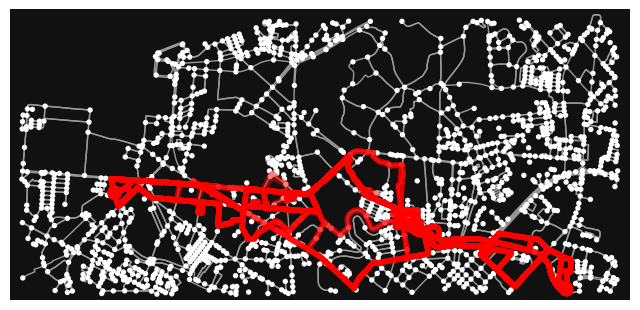

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [268]:
edmonds_karp = find_maximum_flow_using_edmonds_karp(convert_to_graph_for_edmonds_karp(edges_format_2), 1, 12)
print(f'Max value: {edmonds_karp[0]}')

from plot_route import plot_routes
plot_routes(graph, edmonds_karp[1])

Check one way street and change to two way

In [ ]:
# check one-way street
# list_tmp_valid =[]
# list_tmp_non_valid =[]
# for i in range(len(list_paths)):
#  for data in list_paths[i]:
#     if graph.get_edge_data(data[0],data[1]) == None:
#       list_tmp_non_valid.append((data[0],data[1]))
#     else:
#       list_tmp_valid.append((data[0],data[1]))
# #print(list_tmp_valid)
# print(len(list_tmp_valid))
# print(len(list_tmp_non_valid))
# print(list_tmp_valid)



In [ ]:
# check one-way street
# def check_and_convert_to_two_way(graph, list_paths):
#   # check one-way street
#   #list_tmp_valid =[]
#   list_tmp_non_valid =[]
#   for i in range(len(list_paths)):
#     for data in list_paths[i]:
#         if graph.get_edge_data(data[0],data[1]) == None:
#           list_tmp_non_valid.append((data[0],data[1]))
#         #else:
#         #  list_tmp_valid.append((data[0],data[1]))
#   #print(len(list_tmp_valid))
#   #print(len(list_tmp_non_valid))
#   #print(list_tmp_valid)

#   # drop duplicated path in list_tmp_non_valid
#   drop_duplicate_path = []
#   for path in list_tmp_non_valid:
#     if path not in drop_duplicate_path:
#         drop_duplicate_path.append(path)
#   # apply def make_street_two_way
#   for path in drop_duplicate_path:
#     make_street_two_way(graph, path[1], path[0])
#   return graph

In [ ]:
# Create an empty list to store unique values
# res = []

# # Iterate through each value in the list 'a'
# for val in list_tmp_non_valid:

#     # Check if the value is not already in 'res'
#     if val not in res:

#         # If not present, append it to 'res'
#         res.append(val)

# print(res)
# print(len(res))

In [ ]:
print(processed_graph.get_edge_data(0, 1))

{0: {'osmid': 1219459269, 'name': 'Nguyễn Thái Bình', 'highway': 'tertiary', 'oneway': False, 'reversed': False, 'length': 98.63447945822418, 'geometry': <LINESTRING (681176.728 1194260.618, 681179.867 1194260.636, 681253.327 1194...>, 'u_original': '366367322', 'v_original': '11361818084'}}


In [ ]:
def calculate_max_capacity(data):
  max_capacity = 0
  if data['highway']  == 'trunk':
    max_capacity = 500
  elif data['highway']  == ['trunk', 'primary'] or data['highway'] == ['tertiary', 'secondary']:
    max_capacity = 400
  elif data['highway'] == 'primary':
    max_capacity = 300
  elif data['highway'] == 'primary_link' or data['highway'] == 'secondary':
    max_capacity = 200
  elif data['highway'] == 'secondary_link':
    max_capacity = 150
  elif data['highway'] == 'tertiary':
    max_capacity = 100
  elif data['highway'] == 'tertiary_link' or data['highway'] == 'living_street':
    max_capacity = 70
  elif data['highway'] == 'residential':
    max_capacity = 30
  else:
    max_capacity = 20
  return round(max_capacity*(1+np.random.uniform(-0.1, 0.1)))


edges_format_1 = graph.edges(data=True)
# edges_format_2 = edgeConverter(edges_format_1)
# print(edges_format_2)
list_highway = []
list_lanes = []
for u,v,data in graph.edges(data=True):
  #print(data)
  if data['highway'] not in list_highway:
    list_highway.append(data['highway'])
  #if data['lanes'] is not None :
    #list_lanes.append(data['lanes'])
print(list_highway)
#print(list_lanes)
list_highway_tmp = list_highway.copy()
for u,v,data in graph.edges(data=True):
  #print(data)
  if data['highway']  in list_highway_tmp:
    print(data)
    print(f'cal_max_flow: {calculate_max_capacity(data)}')
    list_highway_tmp.remove(data['highway'])

print(len(list_highway))




['tertiary', 'residential', 'secondary', 'primary', 'primary_link', 'trunk', 'tertiary_link', 'secondary_link', ['trunk', 'primary'], 'living_street', ['tertiary', 'secondary']]
{'osmid': 1219459269, 'name': 'Nguyễn Thái Bình', 'highway': 'tertiary', 'oneway': False, 'reversed': False, 'length': 98.63447945822418, 'geometry': <LINESTRING (681176.728 1194260.618, 681179.867 1194260.636, 681253.327 1194...>, 'u_original': '366367322', 'v_original': '11361818084'}
cal_max_flow: 99
{'osmid': 32581480, 'name': 'Cửu Long', 'highway': 'residential', 'oneway': False, 'reversed': True, 'length': 64.90378751804657, 'u_original': '366367617', 'v_original': '7940859504', 'geometry': <LINESTRING (682233.59 1195498.451, 682285.762 1195519.067, 682293.952 11955...>}
cal_max_flow: 33
{'osmid': 696794337, 'name': 'Lê Văn Sỹ', 'highway': 'secondary', 'oneway': False, 'reversed': False, 'length': 54.507000000000005, 'geometry': <LINESTRING (681995.907 1194028.981, 681989.231 1194033.912, 681986.354 1194.

In [ ]:
# def make_street_two_way(G, u, v):
#     # Check if the forward edge exists
#     if G.has_edge(u, v):
#         # Iterate over each edge key between u and v
#         for key, edge_data in G[u][v].items():
#             # Update the 'oneway' attribute to False
#             edge_data['oneway'] = False
#             print(f"Updated edge ({u}, {v}, key={key}) to be two-way.")

#             # Check if the reverse edge (v, u) with the same key exists
#             if not G.has_edge(v, u, key):
#                 # If reverse edge doesn't exist, add it with the same attributes
#                 reverse_edge_data = edge_data.copy()  # Copy attributes from the original edge
#                 G.add_edge(v, u, key=key, **reverse_edge_data)
#                 print(f"Added reverse edge ({v}, {u}, key={key}) with attributes: {reverse_edge_data}")
#             else:
#                 print(f"Reverse edge ({v}, {u}, key={key}) already exists.")
#     else:
#         print(f"Edge ({u}, {v}) not found in the graph.")

In [ ]:
#make_street_two_way(graph, 8, 904)

In [ ]:
# make street two-way

# for edge in res:
#   make_street_two_way(graph, edge[1], edge[0])


In [ ]:
#print(path_format_visualize[24])


In [ ]:
#print(list_paths[24])

In [ ]:
# print(graph.edges)
# edges_format_1 = graph.edges
# #edges_format_2 = [{'start': i[0], 'dest': i[1], 'travel_time': edges_format_1[i]['length']} for i in edges_format_1]
# testPaths = [{'start': u, 'dest': v, 'travel_time': round(data.get("length", 0))} for u,v,data in graph.edges(data=True)]
# print(testPaths)

# for path in testPaths:
#   if path['start']==8:
#     print(path)

In [ ]:
#buildResidualGraph(testPaths)
# max_flow_by_ff,list_paths,list_travel_time = fordFulkerson(testPaths,1,100)
# print(sum(list_travel_time))
# print(max_flow_by_ff)
# print(list_paths[:3])

In [ ]:
#list_result_graph = [ convertToGraph(convertToEdgeFormat2(path)) for path in list_paths]

In [ ]:
#highlight_edges_on_map(graph, convertToEdgeFormat2(list_paths[0]))

#### TEST CODE

In [ ]:
# G1 = ox.io.load_graphml(filepath=r'/content/'+'newgraph_conso.osm')
# fig, ax = ox.plot_graph(G1, node_color="r")
# print(G1.edges)

In [ ]:
#print(G1.nodes)

In [ ]:
#print(len(list_paths))

In [ ]:
#list_paths[18]

In [ ]:
# list_rs_path01 = [node[0] for node in list_paths[0]]

# fig, ax = ox.plot_graph_route(G1, list_rs_path01, node_size=0)

In [ ]:
# gdf_nodes, gdf_edges = ox.graph_to_gdfs(G1)
# gdf_nodes.head()

In [ ]:
# edge_centrality = nx.closeness_centrality(nx.line_graph(G))
# nx.set_edge_attributes(G, edge_centrality, "edge_centrality")

In [ ]:
# G = ox.graph_from_place("Piedmont, California, USA", network_type="drive")
# G = ox.routing.add_edge_speeds(G)
# G = ox.routing.add_edge_travel_times(G)
# orig = ox.distance.nearest_nodes(G, X=-122.245846, Y=37.828903)
# dest = ox.distance.nearest_nodes(G, X=-122.215006, Y=37.812303)
# # find the shortest path between nodes, minimizing travel time, then plot it
# route = ox.shortest_path(G, orig, dest, weight="travel_time")
# fig, ax = ox.plot_graph_route(G, route, node_size=0)

In [ ]:
# print(route)
# print(G.nodes)

In [ ]:
# test_ls = [{'start': u, 'dest': v, 'travel_time': round(data.get("length", 0))} for u,v,data in G.edges(data=True)]
# print(test_ls)

In [ ]:
# # kiem tra cac diem co duong
# for i in range(600):
#  for j in range (600):
#    #print(i,j)
#    maxflow, all_paths, path_flows = maxFlowByBruteForce(testPaths,i, j)
#    if len(path_flows) >= 3 :
#      for path in all_paths:
#        print(path)
#      #break


In [ ]:
#maxflow, all_paths, path_flows = maxFlowByBruteForce(testPaths,5, 507)

In [ ]:
# # prompt: why maxFlowByBruteForce(testPaths,7, 0) is loop, does not return to a result, please help me analyse with path['start']=7 and path['dest']=0

# def findAllPaths(paths, start, dest, total_time=0, history=None):
#     if history is None:
#         history = []

#     # Correct loop detection: check if the *destination* node is already in the history
#     if any(edge['dest'] == start for edge in history):
#       return []

#     histories = []
#     destinations = getDestList(paths, start, total_time)

#     for each_dest in destinations:
#         new_hist = history + [{'start': start, 'dest': each_dest['dest'], 'travel_time': each_dest['travel_time']}]
#         if each_dest['dest'] == dest:
#             histories.append(new_hist)
#         else:
#             histories += findAllPaths(paths, each_dest['dest'], dest, each_dest['total_time'], new_hist)

#     return histories